In [48]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql

In [85]:
with pg.connect(database='stock_db',
                user='postgres',
                host='localhost',
                password='qorwns1',
                port=5432) as conn:
    sql = 'select * from stockprice_info.kospi_stockprice_info_1 where "srtnCd"=\'035420\''
    df = psql.read_sql(sql,conn)

C:\Users\EXEM\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [86]:
df.sort_values(by='basDt')

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,2020-01-02,035420,KR7035420009,NAVER,KOSPI,182500,-4000,-2.14,187500,188000,182000,300640,55309555500,164813395,30078444587500
1,2020-01-03,035420,KR7035420009,NAVER,KOSPI,181500,-1000,-0.55,185000,186000,180500,454492,82879082000,164813395,29913631192500
2,2020-01-06,035420,KR7035420009,NAVER,KOSPI,180500,-1000,-0.55,180000,182000,178000,287970,51850594000,164813395,29748817797500
3,2020-01-07,035420,KR7035420009,NAVER,KOSPI,187000,6500,3.60,182500,187000,181500,328624,60938161000,164813395,30820104865000
4,2020-01-08,035420,KR7035420009,NAVER,KOSPI,183000,-4000,-2.14,182000,183500,179000,820867,149007274500,164813395,30160851285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2022-12-23,035420,KR7035420009,NAVER,KOSPI,178000,-6500,-3.52,180500,182000,178000,613209,109969984000,164049085,29200737130000
737,2022-12-26,035420,KR7035420009,NAVER,KOSPI,178500,500,0.28,178500,180500,177000,350843,62675445000,164049085,29282761672500
738,2022-12-27,035420,KR7035420009,NAVER,KOSPI,181000,2500,1.40,179500,182500,179000,492232,88792538000,164049085,29692884385000
739,2022-12-28,035420,KR7035420009,NAVER,KOSPI,180000,-1000,-0.55,179000,183500,178000,580495,104937784500,164049085,29528835300000


In [90]:
def clpr_scaler(df):
    latest=df['lstgStCnt'].iloc[-1]
    df['ratio']=df['lstgStCnt'].apply(lambda x:x/latest)
    df['new_clpr']=df['clpr']*df['ratio']
    return df.drop(columns='ratio')

In [91]:
#def clpr_scaler_1(df):
ndf=df.sort_values(by='basDt').reset_index(drop=True)
ndf['basDt']=pd.to_datetime(ndf['basDt'])

ndf['lstgStCnt_1']=ndf['lstgStCnt'].shift(-1)
ndf['clpr_1']=ndf['clpr'].shift(-1)
ndf['checkpoint']=ndf.apply(lambda x:True if x['lstgStCnt_1']==x['lstgStCnt'] else False ,axis=1)

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt,new_clpr
0,2020-01-02,035420,KR7035420009,NAVER,KOSPI,182500,-4000,-2.14,187500,188000,182000,300640,55309555500,164813395,30078444587500,183350.273411
1,2020-01-03,035420,KR7035420009,NAVER,KOSPI,181500,-1000,-0.55,185000,186000,180500,454492,82879082000,164813395,29913631192500,182345.614378
2,2020-01-06,035420,KR7035420009,NAVER,KOSPI,180500,-1000,-0.55,180000,182000,178000,287970,51850594000,164813395,29748817797500,181340.955346
3,2020-01-07,035420,KR7035420009,NAVER,KOSPI,187000,6500,3.60,182500,187000,181500,328624,60938161000,164813395,30820104865000,187871.239056
4,2020-01-08,035420,KR7035420009,NAVER,KOSPI,183000,-4000,-2.14,182000,183500,179000,820867,149007274500,164813395,30160851285000,183852.602927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2022-12-23,035420,KR7035420009,NAVER,KOSPI,178000,-6500,-3.52,180500,182000,178000,613209,109969984000,164049085,29200737130000,178000.000000
737,2022-12-26,035420,KR7035420009,NAVER,KOSPI,178500,500,0.28,178500,180500,177000,350843,62675445000,164049085,29282761672500,178500.000000
738,2022-12-27,035420,KR7035420009,NAVER,KOSPI,181000,2500,1.40,179500,182500,179000,492232,88792538000,164049085,29692884385000,181000.000000
739,2022-12-28,035420,KR7035420009,NAVER,KOSPI,180000,-1000,-0.55,179000,183500,178000,580495,104937784500,164049085,29528835300000,180000.000000


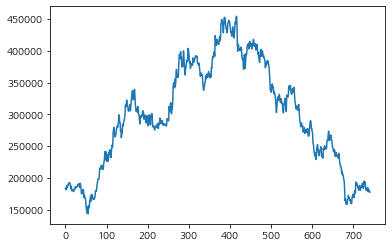

In [ ]:
plt.plot(df['new_clpr'])
plt.plot(df['clpr'])